In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np


from scipy.stats import zscore

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle
#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report



from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


import csv

import itertools

import os


import pandas as pd
import io
import requests


Using TensorFlow backend.


In [2]:
# used function


def read_csv_798():
    data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_798)):
        if(int(data_frame_798["1.0.7"][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_798["1.0.7"][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_798['yes']=yes
    data_frame_798['no']=no
    
    print(len(data_frame_798))
    print(len(yes))
    print(len(no))
    return data_frame_798

def read_csv_834():
    data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_834)):
        if(int(data_frame_834['1.0.4'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_834['1.0.4'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_834['yes']=yes
    data_frame_834['no']=no
    
    print(len(data_frame_834))
    print(len(yes))
    print(len(no))
    return data_frame_834

def read_csv_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    yes = []
    no = []
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
       'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
       'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    for i in range(len(data_frame_m)):
        if(int(data_frame_m['IHD-HeartAttack'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_m['IHD-HeartAttack'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_m['yes']=yes
    data_frame_m['no']=no
    
    print(len(data_frame_m))
    print(len(yes))
    print(len(no))
    return data_frame_m


#suffle the data set
def create_data_set(data_frame):
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    data_set = df.values
    return data_set

#when i have delete ECG feature
def x_data_y_data_create(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y


#full data set one label
def x_data_y_data_create_1(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

# without ECG data set one label
def x_data_y_data_create_2(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y


#multi label data set 
def x_data_y_data_create_3(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#multi label data set without ECG
def x_data_y_data_create_4(data_set):
    actual_x = data_set[:,:len(data_set[0])-4]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#no ECG feature one label
def x_data_y_data_create_5(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

def split_data(data_set):
    # split into train and test sets
    train_size = int(len(data_set) * 0.75)
    test_size = len(data_set) - train_size   
    train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

    train_x = train[:,:len(data_set[0])-2]
    train_y = train[:,len(data_set[0])-2:]

    test_x = test[:,:len(data_set[0])-2]
    test_y = test[:,len(data_set[0])-2:]

    print(len(train), len(test))
    
    return train_x,train_y,test_x,test_y


def ann_model(input_shape) : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(input_shape,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

def confussion_matrix_generator(test_y,rounded_predicted_result):
    #rounded_predections = self.model.predict_classes(self.test_x,batch_size=10,verbose=0)
    cm = confusion_matrix(test_y,rounded_predicted_result)
    cm = cm
    cm_plot_labels = ['no ', 'yes']
    print(cm)
    #self.plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')
    return cm


def ROC_curve_generator(model,X_test):
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)
    
    
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [3]:
data_frame_name_list = ['data_798.tab','data_834.tab','RihanSirPreprocess.tab']

keras_optimizers = [
    keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
    keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
    keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
    keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
    keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
]


keras_loss = [losses.mean_squared_error,
              losses.mean_absolute_error,
              losses.mean_absolute_percentage_error,
              losses.mean_squared_logarithmic_error,
              losses.squared_hinge,
              losses.hinge,
              losses.categorical_hinge,
              losses.logcosh,
              losses.categorical_crossentropy,
              losses.sparse_categorical_crossentropy,
              losses.binary_crossentropy,
              losses.kullback_leibler_divergence,
              losses.poisson,
              losses.cosine_proximity,             
             ]

data_frame = []


batch_size = 30
num_classes = 2
epochs = 5

X_train =[]
Y_train =[]
X_test =[]
Y_test = []

input_size = 0

In [63]:
#data_frame = read_csv_798()

#data_frame = read_csv_834()

#data_frame = pd.read_csv('data_834.tab', sep='\t')
data_frame = pd.read_csv('data_v2_clean_ecg.tab', sep='\t')

#data_frame = read_csv_835()

In [64]:
data_frame.columns

Index(['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical_Exercise',
       'Family_History', 'Drug_History', 'Psychological_Stress', 'Chest_Pain',
       'Dyspnea', 'Palpitation', 'ECG', 'IHD-HeartAttack'],
      dtype='object')

In [65]:
len(data_frame.columns)

15

In [66]:
data_frame = data_frame[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical_Exercise',
       'Family_History', 'Drug_History', 'Psychological_Stress', 'Chest_Pain',
       'Dyspnea',  'IHD-HeartAttack']]

In [67]:
data_set = create_data_set(data_frame)

In [68]:
for i in data_set:
    print(i)

[50.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.]
[55.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.]
[65.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  1.]
[65.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  0.  1.]
[44.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[37.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.]
[70.  1.  2.  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.]
[50.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[71.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.]
[70.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
[60.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]
[62.  1.  2.  1.  0.  0.  0.  0.  1.  0.  1.  0.  1.]
[42.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.]
[55.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.]
[62.  2.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  1.]
[70.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.]
[38.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.]
[38.  2.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.]
[48.  1.  1.  0.  0.  0.  0.

[65.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0.  1.]
[56.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.]
[56.  2.  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.]
[65.  2.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  1.]
[40.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[47.  2.  0.  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.]
[52.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.]
[40.  2.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.]
[60.  2.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
[57.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.]
[40.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[49.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[60.  2.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.]
[50.  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.]
[75.  2.  0.  1.  1.  1.  0.  1.  1.  0.  1.  0.  1.]
[55.  1.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.]
[60.  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  1.]
[54.  2.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
[30.  1.  1.  0.  0.  0.  0.

In [69]:
actual_x,actual_y = x_data_y_data_create_5(data_set)

In [70]:
len(data_set[0])

13

In [71]:
len(actual_x[0])

12

In [72]:
len(actual_y[0])

1

# 10 #losses.sparse_categorical_crossentropy,
              

fold #1
Train on 751 samples, validate on 84 samples
Epoch 1/200
 - 4s - loss: 0.8288 - acc: 0.5979 - val_loss: 0.6958 - val_acc: 0.6190
Epoch 2/200
 - 0s - loss: 0.6561 - acc: 0.6138 - val_loss: 0.6682 - val_acc: 0.6190
Epoch 3/200
 - 0s - loss: 0.6538 - acc: 0.6152 - val_loss: 0.6638 - val_acc: 0.6190
Epoch 4/200
 - 0s - loss: 0.6455 - acc: 0.6312 - val_loss: 0.6509 - val_acc: 0.6190
Epoch 5/200
 - 0s - loss: 0.6449 - acc: 0.6312 - val_loss: 0.6361 - val_acc: 0.6190
Epoch 6/200
 - 0s - loss: 0.6388 - acc: 0.6365 - val_loss: 0.7320 - val_acc: 0.6190
Epoch 7/200
 - 0s - loss: 0.6335 - acc: 0.6431 - val_loss: 0.8964 - val_acc: 0.3810
Epoch 8/200
 - 0s - loss: 0.6378 - acc: 0.6498 - val_loss: 0.6489 - val_acc: 0.6071
Epoch 9/200
 - 0s - loss: 0.6143 - acc: 0.6724 - val_loss: 0.6508 - val_acc: 0.6310
Epoch 10/200
 - 0s - loss: 0.6142 - acc: 0.6884 - val_loss: 0.7137 - val_acc: 0.6190
Epoch 11/200
 - 0s - loss: 0.6201 - acc: 0.6804 - val_loss: 0.6348 - val_acc: 0.6310
Epoch 12/200
 - 0s - 

Epoch 97/200
 - 0s - loss: 0.5856 - acc: 0.7111 - val_loss: 0.6513 - val_acc: 0.6548
Epoch 98/200
 - 0s - loss: 0.5841 - acc: 0.7071 - val_loss: 0.6301 - val_acc: 0.6905
Epoch 99/200
 - 0s - loss: 0.5853 - acc: 0.7177 - val_loss: 0.6397 - val_acc: 0.6548
Epoch 100/200
 - 0s - loss: 0.5820 - acc: 0.7124 - val_loss: 0.6260 - val_acc: 0.7024
Epoch 101/200
 - 0s - loss: 0.5807 - acc: 0.7111 - val_loss: 0.6349 - val_acc: 0.6667
Epoch 102/200
 - 0s - loss: 0.5810 - acc: 0.7044 - val_loss: 0.6410 - val_acc: 0.6786
Epoch 103/200
 - 0s - loss: 0.5865 - acc: 0.7111 - val_loss: 0.6392 - val_acc: 0.6548
Epoch 104/200
 - 0s - loss: 0.5798 - acc: 0.7150 - val_loss: 0.6636 - val_acc: 0.6548
Epoch 105/200
 - 0s - loss: 0.5827 - acc: 0.7111 - val_loss: 0.6321 - val_acc: 0.6786
Epoch 106/200
 - 0s - loss: 0.5852 - acc: 0.7124 - val_loss: 0.6432 - val_acc: 0.6667
Epoch 107/200
 - 0s - loss: 0.5798 - acc: 0.7097 - val_loss: 0.6330 - val_acc: 0.6667
Epoch 108/200
 - 0s - loss: 0.5804 - acc: 0.7097 - val_lo

Epoch 193/200
 - 0s - loss: 0.5738 - acc: 0.7071 - val_loss: 0.6375 - val_acc: 0.6905
Epoch 194/200
 - 0s - loss: 0.5760 - acc: 0.7164 - val_loss: 0.6494 - val_acc: 0.6548
Epoch 195/200
 - 0s - loss: 0.5710 - acc: 0.7217 - val_loss: 0.6321 - val_acc: 0.6548
Epoch 196/200
 - 0s - loss: 0.5732 - acc: 0.7164 - val_loss: 0.6071 - val_acc: 0.6905
Epoch 197/200
 - 0s - loss: 0.5794 - acc: 0.7097 - val_loss: 0.6126 - val_acc: 0.6667
Epoch 198/200
 - 0s - loss: 0.5739 - acc: 0.7071 - val_loss: 0.6836 - val_acc: 0.6310
Epoch 199/200
 - 0s - loss: 0.5908 - acc: 0.7004 - val_loss: 0.6271 - val_acc: 0.6667
Epoch 200/200
 - 0s - loss: 0.5793 - acc: 0.7164 - val_loss: 0.6494 - val_acc: 0.6429


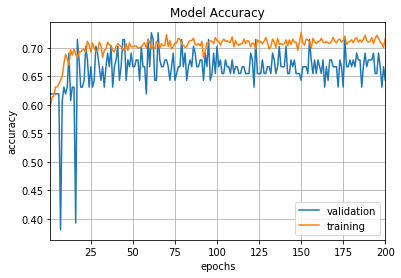

84/84 [==============================] - 0s 96us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.649436028230758, 0.6428571400188264]
 best Score: 0.6428571400188264          
-------------------------------------------------------------------------------------------


fold #2
Train on 751 samples, validate on 84 samples
Epoch 1/200
 - 4s - loss: 0.8325 - acc: 0.5806 - val_loss: 0.5875 - val_acc: 0.7024
Epoch 2/200
 - 0s - loss: 0.6776 - acc: 0.5859 - val_loss: 0.5697 - val_acc: 0.7024
Epoch 3/200
 - 0s - loss: 0.6706 - acc: 0.5859 - val_loss: 0.5587 - val_acc: 0.7024
Epoch 4/200
 - 0s - loss: 0.6620 - acc: 0.6005 - val_loss: 0.5990 - val_acc: 0.7143
Epoch 5/200
 - 0s - loss: 0.6638 - acc: 0.5979 - val_loss: 0.5514 - val_acc: 0.7143
Epoch 6/200
 - 0s - loss: 0.6590 - acc: 0.6072 - val_loss: 0.5420 - val_acc: 0.7024
Epoch 7/200
 - 0s - loss: 0.6575 - acc: 0.6112 - val_loss: 0.6239 - val_acc: 0.7619
Epoch 8/200

Epoch 93/200
 - 0s - loss: 0.6050 - acc: 0.6871 - val_loss: 0.4753 - val_acc: 0.8333
Epoch 94/200
 - 0s - loss: 0.6046 - acc: 0.6911 - val_loss: 0.4589 - val_acc: 0.8214
Epoch 95/200
 - 0s - loss: 0.6011 - acc: 0.6858 - val_loss: 0.4657 - val_acc: 0.7619
Epoch 96/200
 - 0s - loss: 0.6076 - acc: 0.6778 - val_loss: 0.4821 - val_acc: 0.8333
Epoch 97/200
 - 0s - loss: 0.6036 - acc: 0.6871 - val_loss: 0.4995 - val_acc: 0.8214
Epoch 98/200
 - 0s - loss: 0.6038 - acc: 0.6951 - val_loss: 0.4775 - val_acc: 0.8452
Epoch 99/200
 - 0s - loss: 0.6033 - acc: 0.6924 - val_loss: 0.5339 - val_acc: 0.8214
Epoch 100/200
 - 0s - loss: 0.6028 - acc: 0.6897 - val_loss: 0.4818 - val_acc: 0.7976
Epoch 101/200
 - 0s - loss: 0.6033 - acc: 0.6844 - val_loss: 0.5077 - val_acc: 0.8095
Epoch 102/200
 - 0s - loss: 0.6039 - acc: 0.6897 - val_loss: 0.5067 - val_acc: 0.8095
Epoch 103/200
 - 0s - loss: 0.6041 - acc: 0.6818 - val_loss: 0.4813 - val_acc: 0.8333
Epoch 104/200
 - 0s - loss: 0.5971 - acc: 0.6911 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6006 - acc: 0.6977 - val_loss: 0.4927 - val_acc: 0.8214
Epoch 190/200
 - 0s - loss: 0.5940 - acc: 0.7044 - val_loss: 0.4605 - val_acc: 0.8333
Epoch 191/200
 - 0s - loss: 0.5904 - acc: 0.7084 - val_loss: 0.4709 - val_acc: 0.8214
Epoch 192/200
 - 0s - loss: 0.5920 - acc: 0.7017 - val_loss: 0.4760 - val_acc: 0.8214
Epoch 193/200
 - 0s - loss: 0.5902 - acc: 0.7017 - val_loss: 0.4816 - val_acc: 0.8333
Epoch 194/200
 - 0s - loss: 0.5886 - acc: 0.7004 - val_loss: 0.4698 - val_acc: 0.8214
Epoch 195/200
 - 0s - loss: 0.5933 - acc: 0.7057 - val_loss: 0.4751 - val_acc: 0.8095
Epoch 196/200
 - 0s - loss: 0.5919 - acc: 0.7031 - val_loss: 0.4821 - val_acc: 0.8214
Epoch 197/200
 - 0s - loss: 0.5948 - acc: 0.7031 - val_loss: 0.4547 - val_acc: 0.8333
Epoch 198/200
 - 0s - loss: 0.5901 - acc: 0.7097 - val_loss: 0.4665 - val_acc: 0.8214
Epoch 199/200
 - 0s - loss: 0.5919 - acc: 0.7084 - val_loss: 0.4890 - val_acc: 0.8214
Epoch 200/200
 - 0s - loss: 0.5909 - acc: 0.7057 - val

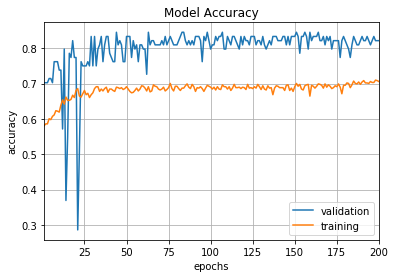

84/84 [==============================] - 0s 133us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.512311312414351, 0.8214285771052042]
 best Score: 0.8214285771052042          
-------------------------------------------------------------------------------------------


fold #3
Train on 751 samples, validate on 84 samples
Epoch 1/200
 - 4s - loss: 0.7629 - acc: 0.4487 - val_loss: 0.6834 - val_acc: 0.5833
Epoch 2/200
 - 0s - loss: 0.6760 - acc: 0.6152 - val_loss: 0.6806 - val_acc: 0.5833
Epoch 3/200
 - 0s - loss: 0.6718 - acc: 0.6152 - val_loss: 0.6795 - val_acc: 0.5833
Epoch 4/200
 - 0s - loss: 0.6694 - acc: 0.6152 - val_loss: 0.6792 - val_acc: 0.5833
Epoch 5/200
 - 0s - loss: 0.6677 - acc: 0.6152 - val_loss: 0.6796 - val_acc: 0.5833
Epoch 6/200
 - 0s - loss: 0.6671 - acc: 0.6152 - val_loss: 0.6801 - val_acc: 0.5833
Epoch 7/200
 - 0s - loss: 0.6667 - acc: 0.6152 - val_loss: 0.6804 - val_acc: 0.5833
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 0.6811 - val_acc: 0.5833
Epoch 94/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 0.6809 - val_acc: 0.5833
Epoch 95/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 0.6812 - val_acc: 0.5833
Epoch 96/200
 - 0s - loss: 0.6667 - acc: 0.6152 - val_loss: 0.6817 - val_acc: 0.5833
Epoch 97/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 0.6817 - val_acc: 0.5833
Epoch 98/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 0.6815 - val_acc: 0.5833
Epoch 99/200
 - 0s - loss: 0.6668 - acc: 0.6152 - val_loss: 0.6811 - val_acc: 0.5833
Epoch 100/200
 - 0s - loss: 0.6667 - acc: 0.6152 - val_loss: 0.6815 - val_acc: 0.5833
Epoch 101/200
 - 0s - loss: 0.6667 - acc: 0.6152 - val_loss: 0.6811 - val_acc: 0.5833
Epoch 102/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 0.6813 - val_acc: 0.5833
Epoch 103/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 0.6816 - val_acc: 0.5833
Epoch 104/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 0.6810 - val_acc: 0.5833
Epoch 190/200
 - 0s - loss: 0.6665 - acc: 0.6152 - val_loss: 0.6810 - val_acc: 0.5833
Epoch 191/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 0.6812 - val_acc: 0.5833
Epoch 192/200
 - 0s - loss: 0.6665 - acc: 0.6152 - val_loss: 0.6815 - val_acc: 0.5833
Epoch 193/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 0.6815 - val_acc: 0.5833
Epoch 194/200
 - 0s - loss: 0.6668 - acc: 0.6152 - val_loss: 0.6811 - val_acc: 0.5833
Epoch 195/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 0.6810 - val_acc: 0.5833
Epoch 196/200
 - 0s - loss: 0.6665 - acc: 0.6152 - val_loss: 0.6811 - val_acc: 0.5833
Epoch 197/200
 - 0s - loss: 0.6669 - acc: 0.6152 - val_loss: 0.6816 - val_acc: 0.5833
Epoch 198/200
 - 0s - loss: 0.6665 - acc: 0.6152 - val_loss: 0.6810 - val_acc: 0.5833
Epoch 199/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val_loss: 0.6813 - val_acc: 0.5833
Epoch 200/200
 - 0s - loss: 0.6666 - acc: 0.6152 - val

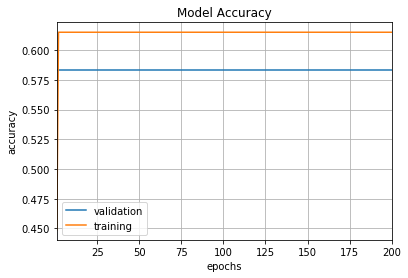

84/84 [==============================] - 0s 149us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.6816534910883222, 0.5833333361716497]
 best Score: 0.8214285771052042          
-------------------------------------------------------------------------------------------


fold #4
Train on 751 samples, validate on 84 samples
Epoch 1/200
 - 4s - loss: 0.8292 - acc: 0.5300 - val_loss: 0.6889 - val_acc: 0.5476
Epoch 2/200
 - 0s - loss: 0.6755 - acc: 0.6192 - val_loss: 0.6888 - val_acc: 0.5476
Epoch 3/200
 - 0s - loss: 0.6707 - acc: 0.6192 - val_loss: 0.6901 - val_acc: 0.5476
Epoch 4/200
 - 0s - loss: 0.6675 - acc: 0.6192 - val_loss: 0.6922 - val_acc: 0.5476
Epoch 5/200
 - 0s - loss: 0.6659 - acc: 0.6192 - val_loss: 0.6945 - val_acc: 0.5476
Epoch 6/200
 - 0s - loss: 0.6651 - acc: 0.6192 - val_loss: 0.6956 - val_acc: 0.5476
Epoch 7/200
 - 0s - loss: 0.6649 - acc: 0.6192 - val_loss: 0.6969 - val_acc: 0.5476
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.6648 - acc: 0.6192 - val_loss: 0.6984 - val_acc: 0.5476
Epoch 94/200
 - 0s - loss: 0.6646 - acc: 0.6192 - val_loss: 0.6991 - val_acc: 0.5476
Epoch 95/200
 - 0s - loss: 0.6650 - acc: 0.6192 - val_loss: 0.7003 - val_acc: 0.5476
Epoch 96/200
 - 0s - loss: 0.6647 - acc: 0.6192 - val_loss: 0.6987 - val_acc: 0.5476
Epoch 97/200
 - 0s - loss: 0.6647 - acc: 0.6192 - val_loss: 0.6997 - val_acc: 0.5476
Epoch 98/200
 - 0s - loss: 0.6648 - acc: 0.6192 - val_loss: 0.6996 - val_acc: 0.5476
Epoch 99/200
 - 0s - loss: 0.6647 - acc: 0.6192 - val_loss: 0.7000 - val_acc: 0.5476
Epoch 100/200
 - 0s - loss: 0.6648 - acc: 0.6192 - val_loss: 0.7003 - val_acc: 0.5476
Epoch 101/200
 - 0s - loss: 0.6647 - acc: 0.6192 - val_loss: 0.6989 - val_acc: 0.5476
Epoch 102/200
 - 0s - loss: 0.6647 - acc: 0.6192 - val_loss: 0.6981 - val_acc: 0.5476
Epoch 103/200
 - 0s - loss: 0.6647 - acc: 0.6192 - val_loss: 0.6983 - val_acc: 0.5476
Epoch 104/200
 - 0s - loss: 0.6648 - acc: 0.6192 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6646 - acc: 0.6192 - val_loss: 0.6996 - val_acc: 0.5476
Epoch 190/200
 - 0s - loss: 0.6647 - acc: 0.6192 - val_loss: 0.7002 - val_acc: 0.5476
Epoch 191/200
 - 0s - loss: 0.6646 - acc: 0.6192 - val_loss: 0.6997 - val_acc: 0.5476
Epoch 192/200
 - 0s - loss: 0.6646 - acc: 0.6192 - val_loss: 0.6991 - val_acc: 0.5476
Epoch 193/200
 - 0s - loss: 0.6646 - acc: 0.6192 - val_loss: 0.6987 - val_acc: 0.5476
Epoch 194/200
 - 0s - loss: 0.6648 - acc: 0.6192 - val_loss: 0.6986 - val_acc: 0.5476
Epoch 195/200
 - 0s - loss: 0.6647 - acc: 0.6192 - val_loss: 0.6989 - val_acc: 0.5476
Epoch 196/200
 - 0s - loss: 0.6647 - acc: 0.6192 - val_loss: 0.6990 - val_acc: 0.5476
Epoch 197/200
 - 0s - loss: 0.6648 - acc: 0.6192 - val_loss: 0.7000 - val_acc: 0.5476
Epoch 198/200
 - 0s - loss: 0.6647 - acc: 0.6192 - val_loss: 0.6998 - val_acc: 0.5476
Epoch 199/200
 - 0s - loss: 0.6648 - acc: 0.6192 - val_loss: 0.6994 - val_acc: 0.5476
Epoch 200/200
 - 0s - loss: 0.6645 - acc: 0.6192 - val

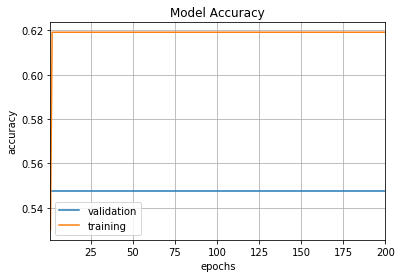

84/84 [==============================] - 0s 233us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6982364711307344, 0.5476190532956805]
 best Score: 0.8214285771052042          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 84 samples
Epoch 1/200
 - 5s - loss: 2.7570 - acc: 0.5379 - val_loss: 0.7617 - val_acc: 0.6429
Epoch 2/200
 - 0s - loss: 0.6837 - acc: 0.5925 - val_loss: 0.8458 - val_acc: 0.4405
Epoch 3/200
 - 0s - loss: 0.6674 - acc: 0.6338 - val_loss: 0.7368 - val_acc: 0.6310
Epoch 4/200
 - 0s - loss: 0.6606 - acc: 0.6258 - val_loss: 1.0604 - val_acc: 0.3810
Epoch 5/200
 - 0s - loss: 0.6423 - acc: 0.6605 - val_loss: 0.6853 - val_acc: 0.6667
Epoch 6/200
 - 0s - loss: 0.6453 - acc: 0.6485 - val_loss: 0.9113 - val_acc: 0.3810
Epoch 7/200
 - 0s - loss: 0.6243 - acc: 0.6724 - val_loss: 0.9444 - val_acc: 0.6310
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5812 - acc: 0.7044 - val_loss: 0.6801 - val_acc: 0.6071
Epoch 94/200
 - 0s - loss: 0.5824 - acc: 0.7097 - val_loss: 0.8728 - val_acc: 0.5357
Epoch 95/200
 - 0s - loss: 0.5906 - acc: 0.6991 - val_loss: 0.6217 - val_acc: 0.7381
Epoch 96/200
 - 0s - loss: 0.5825 - acc: 0.7044 - val_loss: 0.6065 - val_acc: 0.6786
Epoch 97/200
 - 0s - loss: 0.5824 - acc: 0.7044 - val_loss: 0.6106 - val_acc: 0.7024
Epoch 98/200
 - 0s - loss: 0.5838 - acc: 0.7137 - val_loss: 0.6466 - val_acc: 0.6548
Epoch 99/200
 - 0s - loss: 0.5828 - acc: 0.7057 - val_loss: 0.6158 - val_acc: 0.6429
Epoch 100/200
 - 0s - loss: 0.5826 - acc: 0.6964 - val_loss: 0.6060 - val_acc: 0.6786
Epoch 101/200
 - 0s - loss: 0.5808 - acc: 0.7124 - val_loss: 0.6441 - val_acc: 0.7024
Epoch 102/200
 - 0s - loss: 0.5795 - acc: 0.7031 - val_loss: 0.7161 - val_acc: 0.6548
Epoch 103/200
 - 0s - loss: 0.5911 - acc: 0.7124 - val_loss: 0.6381 - val_acc: 0.7143
Epoch 104/200
 - 0s - loss: 0.5883 - acc: 0.7057 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5764 - acc: 0.7137 - val_loss: 0.6400 - val_acc: 0.6905
Epoch 190/200
 - 0s - loss: 0.5712 - acc: 0.7150 - val_loss: 0.6697 - val_acc: 0.7024
Epoch 191/200
 - 0s - loss: 0.5709 - acc: 0.7244 - val_loss: 0.6292 - val_acc: 0.7024
Epoch 192/200
 - 0s - loss: 0.5717 - acc: 0.7257 - val_loss: 0.6100 - val_acc: 0.6786
Epoch 193/200
 - 0s - loss: 0.5776 - acc: 0.7124 - val_loss: 0.6389 - val_acc: 0.6905
Epoch 194/200
 - 0s - loss: 0.5689 - acc: 0.7337 - val_loss: 0.7404 - val_acc: 0.6667
Epoch 195/200
 - 0s - loss: 0.5798 - acc: 0.7150 - val_loss: 0.6209 - val_acc: 0.7143
Epoch 196/200
 - 0s - loss: 0.5738 - acc: 0.7297 - val_loss: 0.6095 - val_acc: 0.6905
Epoch 197/200
 - 0s - loss: 0.5884 - acc: 0.6964 - val_loss: 0.6554 - val_acc: 0.6786
Epoch 198/200
 - 0s - loss: 0.5695 - acc: 0.7177 - val_loss: 0.7707 - val_acc: 0.6190
Epoch 199/200
 - 0s - loss: 0.5773 - acc: 0.7111 - val_loss: 0.6147 - val_acc: 0.6905
Epoch 200/200
 - 0s - loss: 0.5669 - acc: 0.7230 - val

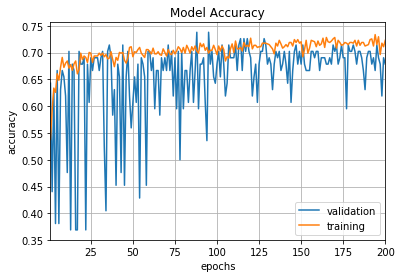

84/84 [==============================] - 0s 141us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.622021564415523, 0.6785714285714286]
 best Score: 0.8214285771052042          
-------------------------------------------------------------------------------------------


fold #6
Train on 752 samples, validate on 83 samples
Epoch 1/200
 - 5s - loss: 0.7147 - acc: 0.5944 - val_loss: 0.7879 - val_acc: 0.4217
Epoch 2/200
 - 0s - loss: 0.6626 - acc: 0.6130 - val_loss: 0.7932 - val_acc: 0.5783
Epoch 3/200
 - 0s - loss: 0.6519 - acc: 0.6051 - val_loss: 0.7172 - val_acc: 0.4699
Epoch 4/200
 - 0s - loss: 0.6424 - acc: 0.6489 - val_loss: 0.6962 - val_acc: 0.5904
Epoch 5/200
 - 0s - loss: 0.6346 - acc: 0.6237 - val_loss: 0.7172 - val_acc: 0.5904
Epoch 6/200
 - 0s - loss: 0.6277 - acc: 0.6543 - val_loss: 0.6690 - val_acc: 0.6506
Epoch 7/200
 - 0s - loss: 0.6234 - acc: 0.6622 - val_loss: 0.6697 - val_acc: 0.6506
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.5852 - acc: 0.7128 - val_loss: 0.6533 - val_acc: 0.6867
Epoch 94/200
 - 0s - loss: 0.5887 - acc: 0.7061 - val_loss: 0.6684 - val_acc: 0.6867
Epoch 95/200
 - 0s - loss: 0.5877 - acc: 0.7074 - val_loss: 0.6396 - val_acc: 0.6747
Epoch 96/200
 - 0s - loss: 0.5938 - acc: 0.6955 - val_loss: 0.6479 - val_acc: 0.6867
Epoch 97/200
 - 0s - loss: 0.5894 - acc: 0.7074 - val_loss: 0.6577 - val_acc: 0.6024
Epoch 98/200
 - 0s - loss: 0.5850 - acc: 0.7008 - val_loss: 0.6433 - val_acc: 0.6627
Epoch 99/200
 - 0s - loss: 0.5871 - acc: 0.7035 - val_loss: 0.6433 - val_acc: 0.6867
Epoch 100/200
 - 0s - loss: 0.5898 - acc: 0.7061 - val_loss: 0.6488 - val_acc: 0.6867
Epoch 101/200
 - 0s - loss: 0.5908 - acc: 0.7021 - val_loss: 0.6429 - val_acc: 0.6988
Epoch 102/200
 - 0s - loss: 0.5861 - acc: 0.7008 - val_loss: 0.6534 - val_acc: 0.6747
Epoch 103/200
 - 0s - loss: 0.5893 - acc: 0.7101 - val_loss: 0.6416 - val_acc: 0.6867
Epoch 104/200
 - 0s - loss: 0.5864 - acc: 0.7128 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5726 - acc: 0.7074 - val_loss: 0.6472 - val_acc: 0.6506
Epoch 190/200
 - 0s - loss: 0.5770 - acc: 0.7061 - val_loss: 0.6551 - val_acc: 0.6627
Epoch 191/200
 - 0s - loss: 0.5777 - acc: 0.7128 - val_loss: 0.6443 - val_acc: 0.6627
Epoch 192/200
 - 0s - loss: 0.5718 - acc: 0.7168 - val_loss: 0.6460 - val_acc: 0.6627
Epoch 193/200
 - 0s - loss: 0.5765 - acc: 0.7048 - val_loss: 0.6414 - val_acc: 0.6506
Epoch 194/200
 - 0s - loss: 0.5737 - acc: 0.7128 - val_loss: 0.6434 - val_acc: 0.6747
Epoch 195/200
 - 0s - loss: 0.5752 - acc: 0.7128 - val_loss: 0.6435 - val_acc: 0.6265
Epoch 196/200
 - 0s - loss: 0.5754 - acc: 0.7101 - val_loss: 0.6583 - val_acc: 0.6265
Epoch 197/200
 - 0s - loss: 0.5795 - acc: 0.7114 - val_loss: 0.6446 - val_acc: 0.6627
Epoch 198/200
 - 0s - loss: 0.5709 - acc: 0.7128 - val_loss: 0.6465 - val_acc: 0.6506
Epoch 199/200
 - 0s - loss: 0.5709 - acc: 0.7074 - val_loss: 0.6877 - val_acc: 0.6506
Epoch 200/200
 - 0s - loss: 0.5846 - acc: 0.7101 - val

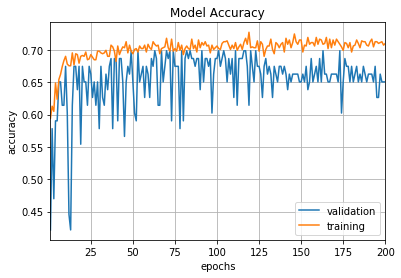

83/83 [==============================] - 0s 131us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.6784427596862057, 0.6506024038935282]
 best Score: 0.8214285771052042          
-------------------------------------------------------------------------------------------


fold #7
Train on 752 samples, validate on 83 samples
Epoch 1/200
 - 5s - loss: 0.6729 - acc: 0.5426 - val_loss: 0.6943 - val_acc: 0.3494
Epoch 2/200
 - 0s - loss: 0.6834 - acc: 0.5931 - val_loss: 0.6502 - val_acc: 0.6386
Epoch 3/200
 - 0s - loss: 0.6615 - acc: 0.6090 - val_loss: 0.6318 - val_acc: 0.6386
Epoch 4/200
 - 0s - loss: 0.6576 - acc: 0.6090 - val_loss: 0.6288 - val_acc: 0.6386
Epoch 5/200
 - 0s - loss: 0.6530 - acc: 0.6090 - val_loss: 0.6254 - val_acc: 0.6386
Epoch 6/200
 - 0s - loss: 0.6547 - acc: 0.6090 - val_loss: 0.6257 - val_acc: 0.6386
Epoch 7/200
 - 0s - loss: 0.6503 - acc: 0.6090 - val_loss: 0.6340 - val_acc: 0.6506
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5880 - acc: 0.6981 - val_loss: 0.6022 - val_acc: 0.6867
Epoch 94/200
 - 0s - loss: 0.5906 - acc: 0.7021 - val_loss: 0.6013 - val_acc: 0.6867
Epoch 95/200
 - 0s - loss: 0.5895 - acc: 0.7074 - val_loss: 0.6016 - val_acc: 0.6627
Epoch 96/200
 - 0s - loss: 0.5903 - acc: 0.7168 - val_loss: 0.5997 - val_acc: 0.6867
Epoch 97/200
 - 0s - loss: 0.5906 - acc: 0.7061 - val_loss: 0.6040 - val_acc: 0.6988
Epoch 98/200
 - 0s - loss: 0.5917 - acc: 0.7048 - val_loss: 0.6013 - val_acc: 0.6867
Epoch 99/200
 - 0s - loss: 0.5924 - acc: 0.7074 - val_loss: 0.5988 - val_acc: 0.6747
Epoch 100/200
 - 0s - loss: 0.5889 - acc: 0.7074 - val_loss: 0.5971 - val_acc: 0.6867
Epoch 101/200
 - 0s - loss: 0.5882 - acc: 0.7074 - val_loss: 0.6039 - val_acc: 0.6627
Epoch 102/200
 - 0s - loss: 0.5897 - acc: 0.6981 - val_loss: 0.6251 - val_acc: 0.6988
Epoch 103/200
 - 0s - loss: 0.5859 - acc: 0.7061 - val_loss: 0.5969 - val_acc: 0.6867
Epoch 104/200
 - 0s - loss: 0.5853 - acc: 0.6995 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5833 - acc: 0.7207 - val_loss: 0.6035 - val_acc: 0.6867
Epoch 190/200
 - 0s - loss: 0.5794 - acc: 0.7101 - val_loss: 0.6008 - val_acc: 0.6627
Epoch 191/200
 - 0s - loss: 0.5787 - acc: 0.7154 - val_loss: 0.5984 - val_acc: 0.6988
Epoch 192/200
 - 0s - loss: 0.5792 - acc: 0.7261 - val_loss: 0.6032 - val_acc: 0.6867
Epoch 193/200
 - 0s - loss: 0.5754 - acc: 0.7247 - val_loss: 0.6100 - val_acc: 0.6506
Epoch 194/200
 - 0s - loss: 0.5766 - acc: 0.7301 - val_loss: 0.6057 - val_acc: 0.6988
Epoch 195/200
 - 0s - loss: 0.5793 - acc: 0.7114 - val_loss: 0.6018 - val_acc: 0.6867
Epoch 196/200
 - 0s - loss: 0.5773 - acc: 0.7194 - val_loss: 0.5991 - val_acc: 0.6747
Epoch 197/200
 - 0s - loss: 0.5797 - acc: 0.7221 - val_loss: 0.6048 - val_acc: 0.7108
Epoch 198/200
 - 0s - loss: 0.5791 - acc: 0.7114 - val_loss: 0.6325 - val_acc: 0.6265
Epoch 199/200
 - 0s - loss: 0.5749 - acc: 0.7141 - val_loss: 0.6046 - val_acc: 0.6988
Epoch 200/200
 - 0s - loss: 0.5764 - acc: 0.7101 - val

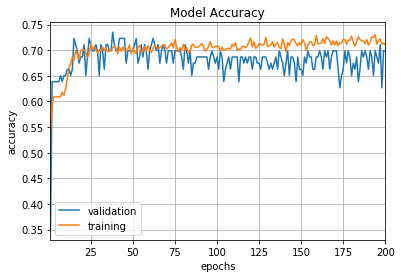

83/83 [==============================] - 0s 193us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6108587111335203, 0.6987951871860458]
 best Score: 0.8214285771052042          
-------------------------------------------------------------------------------------------


fold #8
Train on 752 samples, validate on 83 samples
Epoch 1/200
 - 5s - loss: 1.1546 - acc: 0.6104 - val_loss: 0.6479 - val_acc: 0.6386
Epoch 2/200
 - 0s - loss: 0.6504 - acc: 0.6117 - val_loss: 0.6649 - val_acc: 0.6386
Epoch 3/200
 - 0s - loss: 0.6508 - acc: 0.6277 - val_loss: 0.6492 - val_acc: 0.6024
Epoch 4/200
 - 0s - loss: 0.6451 - acc: 0.6330 - val_loss: 0.6432 - val_acc: 0.6265
Epoch 5/200
 - 0s - loss: 0.6453 - acc: 0.6290 - val_loss: 0.6436 - val_acc: 0.6386
Epoch 6/200
 - 0s - loss: 0.6408 - acc: 0.6383 - val_loss: 0.6410 - val_acc: 0.6265
Epoch 7/200
 - 0s - loss: 0.6368 - acc: 0.6370 - val_loss: 0.6473 - val_acc: 0.6265
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5806 - acc: 0.7061 - val_loss: 0.6626 - val_acc: 0.6867
Epoch 94/200
 - 0s - loss: 0.5855 - acc: 0.7008 - val_loss: 0.6714 - val_acc: 0.6747
Epoch 95/200
 - 0s - loss: 0.5854 - acc: 0.7114 - val_loss: 0.6584 - val_acc: 0.6747
Epoch 96/200
 - 0s - loss: 0.5857 - acc: 0.7074 - val_loss: 0.6645 - val_acc: 0.6747
Epoch 97/200
 - 0s - loss: 0.5832 - acc: 0.6981 - val_loss: 0.6659 - val_acc: 0.6867
Epoch 98/200
 - 0s - loss: 0.5773 - acc: 0.7021 - val_loss: 0.6645 - val_acc: 0.6867
Epoch 99/200
 - 0s - loss: 0.5805 - acc: 0.7114 - val_loss: 0.6632 - val_acc: 0.6988
Epoch 100/200
 - 0s - loss: 0.5807 - acc: 0.6968 - val_loss: 0.6779 - val_acc: 0.6867
Epoch 101/200
 - 0s - loss: 0.5754 - acc: 0.6968 - val_loss: 0.6878 - val_acc: 0.6867
Epoch 102/200
 - 0s - loss: 0.5808 - acc: 0.6955 - val_loss: 0.6656 - val_acc: 0.6747
Epoch 103/200
 - 0s - loss: 0.5777 - acc: 0.6902 - val_loss: 0.6646 - val_acc: 0.6747
Epoch 104/200
 - 0s - loss: 0.5731 - acc: 0.7061 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5727 - acc: 0.7114 - val_loss: 0.7531 - val_acc: 0.6024
Epoch 190/200
 - 0s - loss: 0.5787 - acc: 0.7061 - val_loss: 0.7071 - val_acc: 0.6627
Epoch 191/200
 - 0s - loss: 0.5705 - acc: 0.7141 - val_loss: 0.7091 - val_acc: 0.6386
Epoch 192/200
 - 0s - loss: 0.5719 - acc: 0.7088 - val_loss: 0.7019 - val_acc: 0.6747
Epoch 193/200
 - 0s - loss: 0.5765 - acc: 0.7128 - val_loss: 0.7095 - val_acc: 0.6627
Epoch 194/200
 - 0s - loss: 0.5774 - acc: 0.7168 - val_loss: 0.7160 - val_acc: 0.6506
Epoch 195/200
 - 0s - loss: 0.5705 - acc: 0.7074 - val_loss: 0.7119 - val_acc: 0.6627
Epoch 196/200
 - 0s - loss: 0.5703 - acc: 0.6981 - val_loss: 0.7136 - val_acc: 0.6506
Epoch 197/200
 - 0s - loss: 0.5739 - acc: 0.6995 - val_loss: 0.7146 - val_acc: 0.6747
Epoch 198/200
 - 0s - loss: 0.5750 - acc: 0.6995 - val_loss: 0.7051 - val_acc: 0.6747
Epoch 199/200
 - 0s - loss: 0.5701 - acc: 0.7035 - val_loss: 0.7419 - val_acc: 0.6506
Epoch 200/200
 - 0s - loss: 0.5742 - acc: 0.7088 - val

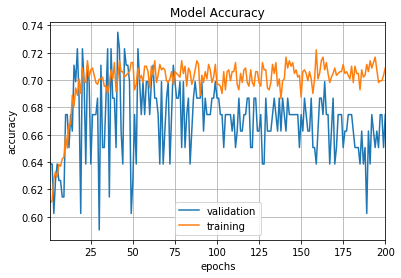

83/83 [==============================] - 0s 121us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.7064954257873167, 0.6746987894356969]
 best Score: 0.8214285771052042          
-------------------------------------------------------------------------------------------


fold #9
Train on 752 samples, validate on 83 samples
Epoch 1/200
 - 5s - loss: 0.7494 - acc: 0.6077 - val_loss: 0.6371 - val_acc: 0.6506
Epoch 2/200
 - 0s - loss: 0.6526 - acc: 0.6090 - val_loss: 0.6351 - val_acc: 0.6506
Epoch 3/200
 - 0s - loss: 0.6491 - acc: 0.6077 - val_loss: 0.6313 - val_acc: 0.6506
Epoch 4/200
 - 0s - loss: 0.6495 - acc: 0.6130 - val_loss: 0.6301 - val_acc: 0.6506
Epoch 5/200
 - 0s - loss: 0.6493 - acc: 0.6117 - val_loss: 0.6318 - val_acc: 0.6506
Epoch 6/200
 - 0s - loss: 0.6464 - acc: 0.6184 - val_loss: 0.6403 - val_acc: 0.6747
Epoch 7/200
 - 0s - loss: 0.6429 - acc: 0.6184 - val_loss: 0.6253 - val_acc: 0.6506
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.6011 - acc: 0.6995 - val_loss: 0.5767 - val_acc: 0.7229
Epoch 94/200
 - 0s - loss: 0.6007 - acc: 0.7061 - val_loss: 0.5771 - val_acc: 0.7229
Epoch 95/200
 - 0s - loss: 0.5986 - acc: 0.7088 - val_loss: 0.5733 - val_acc: 0.7349
Epoch 96/200
 - 0s - loss: 0.6003 - acc: 0.7035 - val_loss: 0.5764 - val_acc: 0.7229
Epoch 97/200
 - 0s - loss: 0.5943 - acc: 0.7008 - val_loss: 0.5762 - val_acc: 0.7349
Epoch 98/200
 - 0s - loss: 0.6007 - acc: 0.6941 - val_loss: 0.5792 - val_acc: 0.7229
Epoch 99/200
 - 0s - loss: 0.5976 - acc: 0.7035 - val_loss: 0.5736 - val_acc: 0.7470
Epoch 100/200
 - 0s - loss: 0.5987 - acc: 0.7035 - val_loss: 0.5735 - val_acc: 0.7349
Epoch 101/200
 - 0s - loss: 0.5983 - acc: 0.7035 - val_loss: 0.5750 - val_acc: 0.7229
Epoch 102/200
 - 0s - loss: 0.5982 - acc: 0.7061 - val_loss: 0.5741 - val_acc: 0.7349
Epoch 103/200
 - 0s - loss: 0.5973 - acc: 0.7128 - val_loss: 0.5788 - val_acc: 0.7229
Epoch 104/200
 - 0s - loss: 0.6006 - acc: 0.6968 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5858 - acc: 0.7048 - val_loss: 0.5732 - val_acc: 0.7349
Epoch 190/200
 - 0s - loss: 0.5865 - acc: 0.7061 - val_loss: 0.5711 - val_acc: 0.7349
Epoch 191/200
 - 0s - loss: 0.5886 - acc: 0.7074 - val_loss: 0.5673 - val_acc: 0.7229
Epoch 192/200
 - 0s - loss: 0.5856 - acc: 0.7114 - val_loss: 0.5672 - val_acc: 0.7590
Epoch 193/200
 - 0s - loss: 0.5872 - acc: 0.6995 - val_loss: 0.5704 - val_acc: 0.7470
Epoch 194/200
 - 0s - loss: 0.5852 - acc: 0.7061 - val_loss: 0.5730 - val_acc: 0.7349
Epoch 195/200
 - 0s - loss: 0.5863 - acc: 0.7008 - val_loss: 0.5683 - val_acc: 0.7229
Epoch 196/200
 - 0s - loss: 0.5875 - acc: 0.7035 - val_loss: 0.5708 - val_acc: 0.7229
Epoch 197/200
 - 0s - loss: 0.5892 - acc: 0.6915 - val_loss: 0.5746 - val_acc: 0.7349
Epoch 198/200
 - 0s - loss: 0.5885 - acc: 0.7021 - val_loss: 0.5756 - val_acc: 0.7349
Epoch 199/200
 - 0s - loss: 0.5856 - acc: 0.7114 - val_loss: 0.5756 - val_acc: 0.7349
Epoch 200/200
 - 0s - loss: 0.5858 - acc: 0.7008 - val

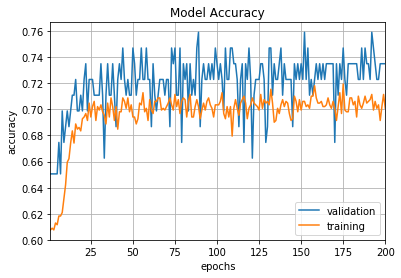

83/83 [==============================] - 0s 125us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.5703590821070843, 0.7349397568817598]
 best Score: 0.8214285771052042          
-------------------------------------------------------------------------------------------


fold #10
Train on 752 samples, validate on 83 samples
Epoch 1/200
 - 6s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 2/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 3/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 4/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 5/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 6/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 7/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 8/

Epoch 93/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 94/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 95/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 96/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 97/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 98/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 99/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 100/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 101/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 102/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 103/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 104/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 

Epoch 189/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 190/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 191/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 192/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 193/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 194/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 195/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 196/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 197/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 198/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 199/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val_loss: 8.7387 - val_acc: 0.4578
Epoch 200/200
 - 0s - loss: 9.9881 - acc: 0.3803 - val

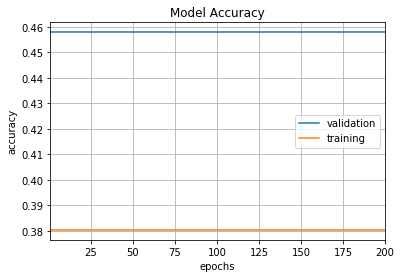

83/83 [==============================] - 0s 118us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [8.73872646079006, 0.45783132458307657]
 best Score: 0.8214285771052042          
-------------------------------------------------------------------------------------------




In [73]:
batch_size = 10
num_classes = 2
epochs = 200

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.sparse_categorical_crossentropy,
                  optimizer=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [58]:
print("accuracy")
best__acc_score = 0.0
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    if(i>best__acc_score):
        best__acc_score = i
    avg_accuracy_score += i

print(best__acc_score)
print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

accuracy
0.7177097187458119
0.6987293549709925


[0.7177097187458119,
 0.7017310266091566,
 0.7043941416213421,
 0.6045273011835532,
 0.7163781636008886,
 0.7087765968939725,
 0.7101063859906602,
 0.7114361731454413,
 0.714095745473466,
 0.6981382964456335]

In [59]:
print("validation ")
print(best_score)

#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

validation 
0.7228915641106755
0.6767498575676739


[[0.666439243725368, 0.6309523837906974],
 [0.5757396533375695, 0.6666666609900338],
 [0.6296205960568928, 0.6785714342480614],
 [0.6387601296106974, 0.6785714257331121],
 [0.6632975339889526, 0.6428571485337757],
 [0.607914933239121, 0.6867469922605768],
 [0.592336726475911, 0.6987951785685068],
 [0.7148766295019403, 0.6626506002552538],
 [0.5490061231406338, 0.7228915641106755],
 [0.5753189634127789, 0.6987951871860458]]

In [17]:
len(actual_x[0])

13

In [18]:
kfold_validation_score_store

[[0.5646147898265294, 0.6904761847995576],
 [0.5876183183420272, 0.6904761933145069],
 [0.6677694320678711, 0.6547619047619048],
 [0.6070078582990737, 0.7023809467043195],
 [0.6891499513603119, 0.6385542147130852],
 [0.5141251080007438, 0.7469879496528442],
 [0.6581806253237896, 0.686746987233679],
 [0.6789856000118945, 0.6746987894356969],
 [0.5147676338632423, 0.7831325315567385],
 [0.635285083787987, 0.7228915641106755]]